# pyhf usage in Top FC 

Expected upper limits on signal strength using pyhf. There are three types of signals in these plots:

* Scalar like
* Vector like
* Tensor like

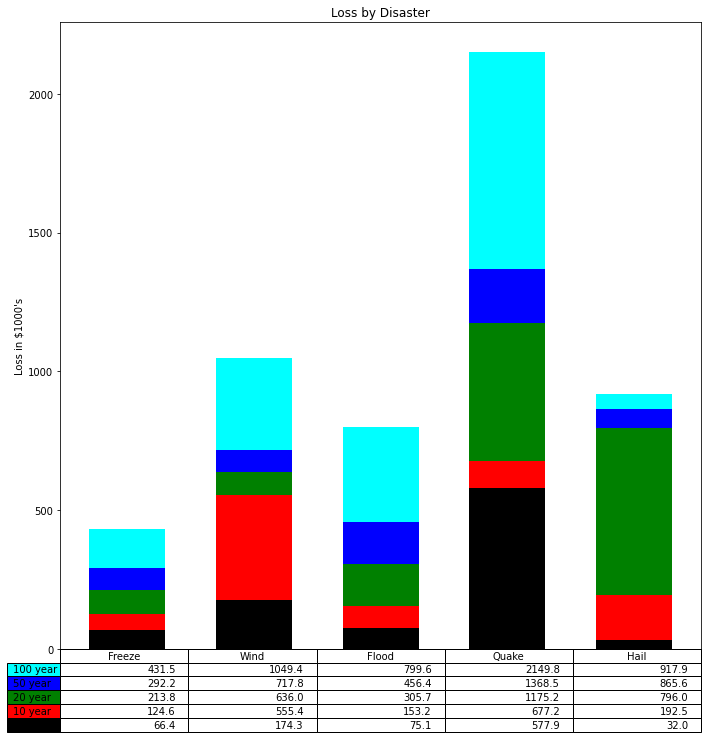

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import array
import ast

plt.figure(figsize=(10,10))
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
#colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
colors = ['black', 'red', 'green', 'blue', 'cyan']
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.6

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.01, bottom=0.01)

plt.ylabel(f"Loss in ${value_increment}'s")
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

In [28]:
import array
import ast

def array_to_list(CL):
    CL = CL.replace('array', '')
    CL = CL.replace('(', '')
    CL = CL.replace(')', '')

    CL = ast.literal_eval(CL)    
    return CL

test = '[array(0.18526298), array(0.23544205), array(0.29602205), array(0.39099281), array(0.48986435)]'
array_to_list(test)


[0.18526298, 0.23544205, 0.29602205, 0.39099281, 0.48986435]

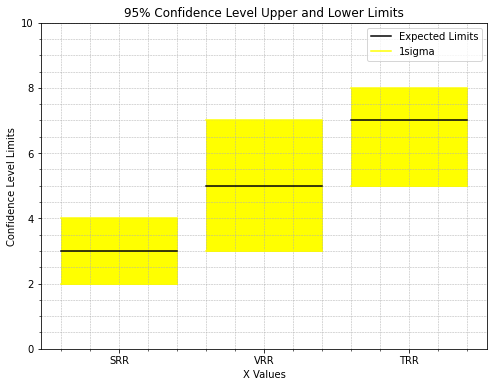

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data (x values)
x_valuesS = np.linspace(1, 3, 2)
x_valuesV = np.linspace(3.5, 5.5, 2)
x_valuesT = np.linspace(6, 8, 2)


# Calculate upper and lower limits for a 95% confidence level
limitsS = [3,3]
limitsV = [5,5]
limitsT = [7,7]

lower_limitsS = [2,2]
upper_limitsS = [4,4]
                       
lower_limitsV = [3,3]
upper_limitsV = [7,7]

lower_limitsT = [5,5]
upper_limitsT = [8,8]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_valuesS, limitsS, label='Expected Limits', color='black')
plt.plot(x_valuesS, lower_limitsS, label='1sigma', color='yellow')
plt.plot(x_valuesS, upper_limitsS, color='yellow')

plt.fill_between(x_valuesS, limitsS, lower_limitsS, color='yellow')  # Fill area between curves
plt.fill_between(x_valuesS, limitsS, upper_limitsS, color='yellow')  # Fill area between curves

plt.plot(x_valuesV, limitsV, color='black')
plt.plot(x_valuesV, lower_limitsV, color='yellow')
plt.plot(x_valuesV, upper_limitsV, color='yellow')

plt.fill_between(x_valuesV, limitsV, lower_limitsV, color='yellow')  # Fill area between curves
plt.fill_between(x_valuesV, limitsV, upper_limitsV, color='yellow')  # Fill area between curves

plt.plot(x_valuesT, limitsT, color='black')
plt.plot(x_valuesT, lower_limitsT, color='yellow')
plt.plot(x_valuesT, upper_limitsT, color='yellow')

plt.fill_between(x_valuesT, limitsT, lower_limitsT, color='yellow')  # Fill area between curves
plt.fill_between(x_valuesT, limitsT, upper_limitsT, color='yellow')  # Fill area between curves

# Add labels and title
plt.xticks([])
plt.xlabel('X Values')
plt.ylabel('Confidence Level Limits')
plt.ylim([0,10])
plt.title('95% Confidence Level Upper and Lower Limits')
plt.legend()

# Customize x-axis ticks and labels
x_ticks = [2, 4.5, 7]  # Specify the tick locations
x_tick_labels = ['SRR', 'VRR', 'TRR']  # Specify the tick labels
plt.xticks(x_ticks, x_tick_labels)  # Apply custom ticks and labels

# Show the plot
#plt.grid(True)
plt.minorticks_on()  # Turn on minor ticks
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.show()
